In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
wine = pd.read_csv(r'C:\Users\LENOVO\Downloads\winequalityN.csv')
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
wine.shape

(6497, 13)

In [6]:
wine.dropna(inplace = True)

In [7]:
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
wine.shape

(6463, 13)

In [9]:
#data preprocessing
bins = (2, 6.5, 8)
group_name = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins = bins,labels = group_name)

In [10]:
label_quality = LabelEncoder()

In [11]:
wine['quality'] = label_quality.fit_transform(wine['quality'].astype(str))

In [12]:
wine['quality'].unique

<bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
6491    0
6492    0
6494    0
6495    0
6496    0
Name: quality, Length: 6463, dtype: int32>

In [13]:
wine.drop(columns='type',inplace=True)
wine.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,0
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,0


In [14]:
wine.shape

(6463, 12)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

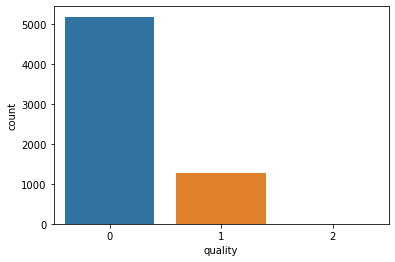

In [19]:
sns.countplot(wine['quality'])

In [22]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)


In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train[:10]

array([[ 5.16538960e-01, -3.06567485e-01,  1.17093899e+00,
        -6.92964176e-01,  1.14383977e+00, -5.38650010e-01,
        -9.93354226e-01,  8.25530613e-01,  5.62763584e-01,
         9.25858933e-01, -3.23770965e-01],
       [ 8.99330432e-01, -7.34446052e-01, -2.68326100e-01,
         2.86624701e+00, -8.08144644e-01,  1.41313253e+00,
         2.63353262e-01,  1.11773407e+00, -1.61770129e+00,
        -1.20772283e+00,  9.31339266e-01],
       [-1.72485689e-01, -4.28818504e-01,  2.79965362e-01,
         3.27362660e+00, -3.20148541e-01,  8.39078842e-01,
         9.71357480e-01,  2.13704843e+00, -1.36850530e+00,
        -5.40978528e-01, -1.41153317e+00],
       [-4.02160572e-01,  4.26938629e-01,  1.42892497e-01,
         8.07908010e-01, -2.05325929e-01, -7.94070590e-02,
         6.17355371e-01,  7.10008319e-01,  2.07261651e-03,
        -1.40931948e-01, -1.16051112e+00],
       [-1.01462693e+00, -6.73320542e-01, -5.42471831e-01,
        -8.21610364e-01, -5.49793766e-01,  9.28090475e-02,
  

## Random Forest Classifier

In [31]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [32]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1042
           1       0.75      0.57      0.65       249
           2       0.00      0.00      0.00         2

    accuracy                           0.88      1293
   macro avg       0.55      0.51      0.53      1293
weighted avg       0.87      0.88      0.87      1293

[[997  45   0]
 [107 142   0]
 [  0   2   0]]


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
